In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import random

#Mendelinan Genetics - Without Dominant Genes

input: one parental (diploid) populations of N=1000, with two homozygotes "AA" (e.g., 900) and "GG" (e.g., 100); a child is produced by randomly selecting a mom and dad, followed by another random selection of gametes (A or G from each parent). Repeat for G generations. Output: genetic diversity in each generation.

In [3]:
##initPop :  builds initial populations with a np array
#input:  popSize
#return:  np.array  representing a population with members  AA or GG
def initPop(popSize,freq1):
  a = [0,0]   #Represents AA
  b =[1,1]    #Represents GG

  zeroMat = np.zeros((popSize,2),dtype =  np.int64)

  for i in range(int(popSize*freq1)):   ##COMMENT: create equal proportion
    zeroMat[i,] = b
  return zeroMat
#initPop(10)

In [4]:
## newPop:  Creates child population from parent population,
#input :  np.array - a population
#output : np.array - a new population
def newPop(currentPop):

  newPop = np.zeros((currentPop.shape[0],currentPop.shape[1]),dtype =  np.int64)                #create an array for newPop
  for i in range(newPop.shape[0]):                                                              #creates a new pop member with each iteration
    parent = np.random.choice(np.arange(0,currentPop.shape[0]), size = 2 , replace = False )    #randomly choose two parents
    gene1 = np.random.choice([0,1],size = 1)                                                    #randomly choose a copy of a gene from a parent1
    gene2 = np.random.choice([0,1], size = 1)                                                   #randomly choose a copy of a gene from a parent1
    newPop[i,0] = currentPop[parent[0],gene1[0]]                                                #note gene1[0] since gene1 is an array
    newPop[i,1] = currentPop[parent[1],gene2[0]]

  return newPop

#newPop(initPop(10))

In [5]:
#alleleTypes: Outputs a list which assigns zygote type for each member of the population
#input: np.array - a population
#output:  list -  zygote types are   2 -> (1,1)   ;  1-> (1,0) or (0,1)  ; 0 -> (0,0)

def alleleTypes(pop):

  alleleType = [0]*pop.shape[0]
  for i in range(pop.shape[0]):
    alleleType[i] = np.sum(pop[i,])         #sum each row

  return alleleType

#alleleTypes(newPop(initPop(10,.2)))

In [6]:
#zygCountsNoDom- outputs frequency of each zygote type (without dominance)
#input :  list - zygote type of each population member
#output:  list - frequency of each zygote type

def zygCount(zygList):

  counts = [0,0,0]

  for i in range(len(zygList)):
    if zygList[i] == 0:
      counts[0] += 1
    elif zygList[i]== 1:
      counts[1] += 1
    else:
      counts[2] += 1
  return counts/np.sum(counts)


#a = alleleTypes((initPop(10,.2)))
#print(a)
#zygCount(a)

[2, 2, 0, 0, 0, 0, 0, 0, 0, 0]


array([0.8, 0. , 0.2])

In [7]:
#mendGen :  outputs a pd.Dataframe where each row gives a frequency count for a particular generation
def  mendGen(pop_size,freq1, num_Gen):
#input : pop_size and num_Gen
#output: pd.DataFrame

  pop = initPop(pop_size,freq1)                         #create the initial pop
  countMat =np.array(zygCount(alleleTypes(pop)))        #create a np array to hold freq counts. Transform to df later
  nG = pop.copy()                                       #place holder population

  for i in range(num_Gen):                              #iterations correspond to generations
    nextGen = newPop(nG)                                #create next generation from nG
    newCount =np.array(zygCount(alleleTypes(nextGen)))  # zygote freq count
    countMat = np.vstack((countMat,newCount))           # add zygote freq count to countMat
    nG = nextGen.copy()

  countMat = np.column_stack((np.arange(0,countMat.shape[0]),countMat))
  df1 = pd.DataFrame(countMat)

  df1.columns = ["Gen","Hom00","Het01", "Hom11"]
  df1 = pd.melt(df1,id_vars= ["Gen"],var_name ="ZygoteType", value_name="Frequency")

  return df1

In [8]:
df1 = mendGen(2000,.2, 50)  # pop_size  should be >2000 to get stability  (Otherwise drift occeus .)
#df1.head(10)

,Gen,ZygoteType,Frequency
0,0.0,Hom00,0.8000
1,1.0,Hom00,0.6395
2,2.0,Hom00,0.6400
3,3.0,Hom00,0.6290
4,4.0,Hom00,0.6315
5,5.0,Hom00,0.6300
6,6.0,Hom00,0.6215
7,7.0,Hom00,0.6310
8,8.0,Hom00,0.6185
9,9.0,Hom00,0.6125


[Text(0.5, 1.0, 'Zygote (2000 total) Freq Counts 50 Generation'),
 Text(0.5, 0, 'Generation'),
 Text(0, 0.5, 'Frequency')]

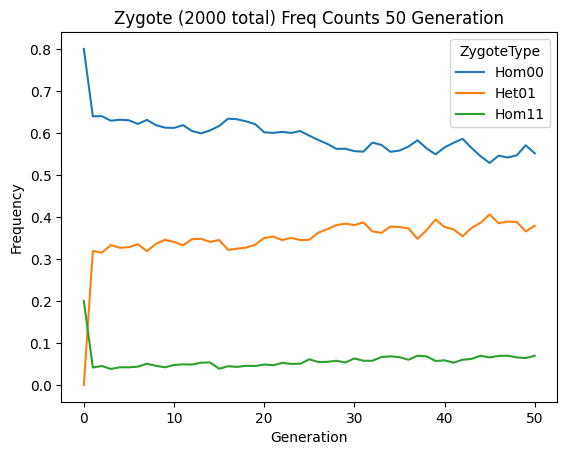

In [9]:
sns.lineplot(x = df1["Gen"], y = df1["Frequency"],hue = df1["ZygoteType"]).set(title = "Zygote (2000 total) Freq Counts 50 Generation",
                                                               xlabel ="Generation",ylabel = "Frequency")


36